<a href="https://colab.research.google.com/github/yashdabhade1/Leather-Defect-Detection-using-DL/blob/main/Leather_defect_detection_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone 'https://github.com/OlgaChernytska/Visual-Inspection.git' 'project'
%cd project

Cloning into 'project'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 110 (delta 2), reused 0 (delta 0), pack-reused 104
Receiving objects: 100% (110/110), 329.09 MiB | 34.68 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Checking out files: 100% (24/24), done.
/content/project


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.0 MB 8.2 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 831.4 MB 2.4 kB/s 
     |████████████████████████████████| 22.1 MB 55.4 MB/s 
     |████████████████████████████████| 15.3 MB 29.6 MB/s 
     |████████████████████████████████| 11.5 MB 34.5 MB/s 
     |████████████████████████████████| 285 kB 63.6 MB/s 
     |████████████████████████████████| 1.4 MB 50.2 MB/s 
     |████████████████████████████████| 96 kB 7.0 MB/s 
     |████████████████████████████████| 843 kB 72.5 MB/s 
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5297 sha256=af9d108630994b303ed7225b62bd51ba004ddf1c3c6f34264f4dccfb9f871c9b
  Stored in directory: /root/.cache/pip/wheels/1e/b2/88/51c66d23ea5fd0d40ed50997555e15d981d92671376a9a412a
Successfully built nb-black
  Attempting uninstall: Pillow
 

In [ ]:
!pip install --upgrade IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 7.4 MB/s 
     |████████████████████████████████| 381 kB 50.6 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: IPython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.30 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


In [ ]:
!tar -xvf "/content/gdrive/MyDrive/CSV/leather.tar" -C "/content/output"     #[run this cell to extract tar files]

leather/
leather/ground_truth/
leather/ground_truth/color/
leather/ground_truth/color/016_mask.png
leather/ground_truth/color/017_mask.png
leather/ground_truth/color/018_mask.png
leather/ground_truth/color/000_mask.png
leather/ground_truth/color/001_mask.png
leather/ground_truth/color/002_mask.png
leather/ground_truth/color/003_mask.png
leather/ground_truth/color/004_mask.png
leather/ground_truth/color/005_mask.png
leather/ground_truth/color/006_mask.png
leather/ground_truth/color/007_mask.png
leather/ground_truth/color/008_mask.png
leather/ground_truth/color/009_mask.png
leather/ground_truth/color/010_mask.png
leather/ground_truth/color/011_mask.png
leather/ground_truth/color/012_mask.png
leather/ground_truth/color/013_mask.png
leather/ground_truth/color/014_mask.png
leather/ground_truth/color/015_mask.png
leather/ground_truth/cut/
leather/ground_truth/cut/016_mask.png
leather/ground_truth/cut/017_mask.png
leather/ground_truth/cut/018_mask.png
leather/ground_truth/cut/000_mask.png
lea

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [ ]:
%cd project

/content/project


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from utils.dataloader import get_train_test_loaders, get_cv_train_test_loaders
from utils.model import CustomVGG
from utils.helper import train, evaluate, predict_localize
from utils.constants import NEG_CLASS

In [ ]:
data_folder = "/content/output/leather"
subset_name = "leather"
# data_folder = os.path.join(data_folder, subset_name)

batch_size = 10
target_train_accuracy = 0.98
lr = 0.0001
epochs = 10
class_weight = [1, 3] if NEG_CLASS == 1 else [3, 1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

heatmap_thres = 0.7
n_cv_folds = 5


In [ ]:
train_loader, test_loader = get_train_test_loaders(
    root=data_folder, batch_size=batch_size, test_size=0.2, random_state=42,
)

Dataset /content/output/leather: N Images = 369, Share of anomalies = 0.249


In [ ]:
model = CustomVGG()

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)
optimizer = optim.Adam(model.parameters(), lr=lr)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
# model = train(
#     train_loader, model, optimizer, criterion, epochs, device, target_train_accuracy
# )
model_path = f"weights/{subset_name}_model.h5"
# torch.save(model, model_path)
model = torch.load(model_path, map_location=device)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


Accuracy: 0.9865
Balanced Accuracy: 0.9737



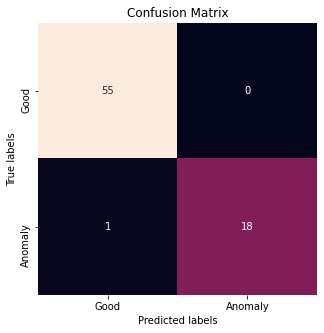

In [ ]:
evaluate(model, test_loader, device)

In [ ]:
cv_folds = get_cv_train_test_loaders(
    root=data_folder, batch_size=batch_size, n_folds=n_cv_folds,
)

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)

for i, (train_loader, test_loader) in enumerate(cv_folds):
    print(f"Fold {i+1}/{n_cv_folds}")
    model = CustomVGG(input_size)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model = train(train_loader, model, optimizer, criterion, epochs, device)
    evaluate(model, test_loader, device)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


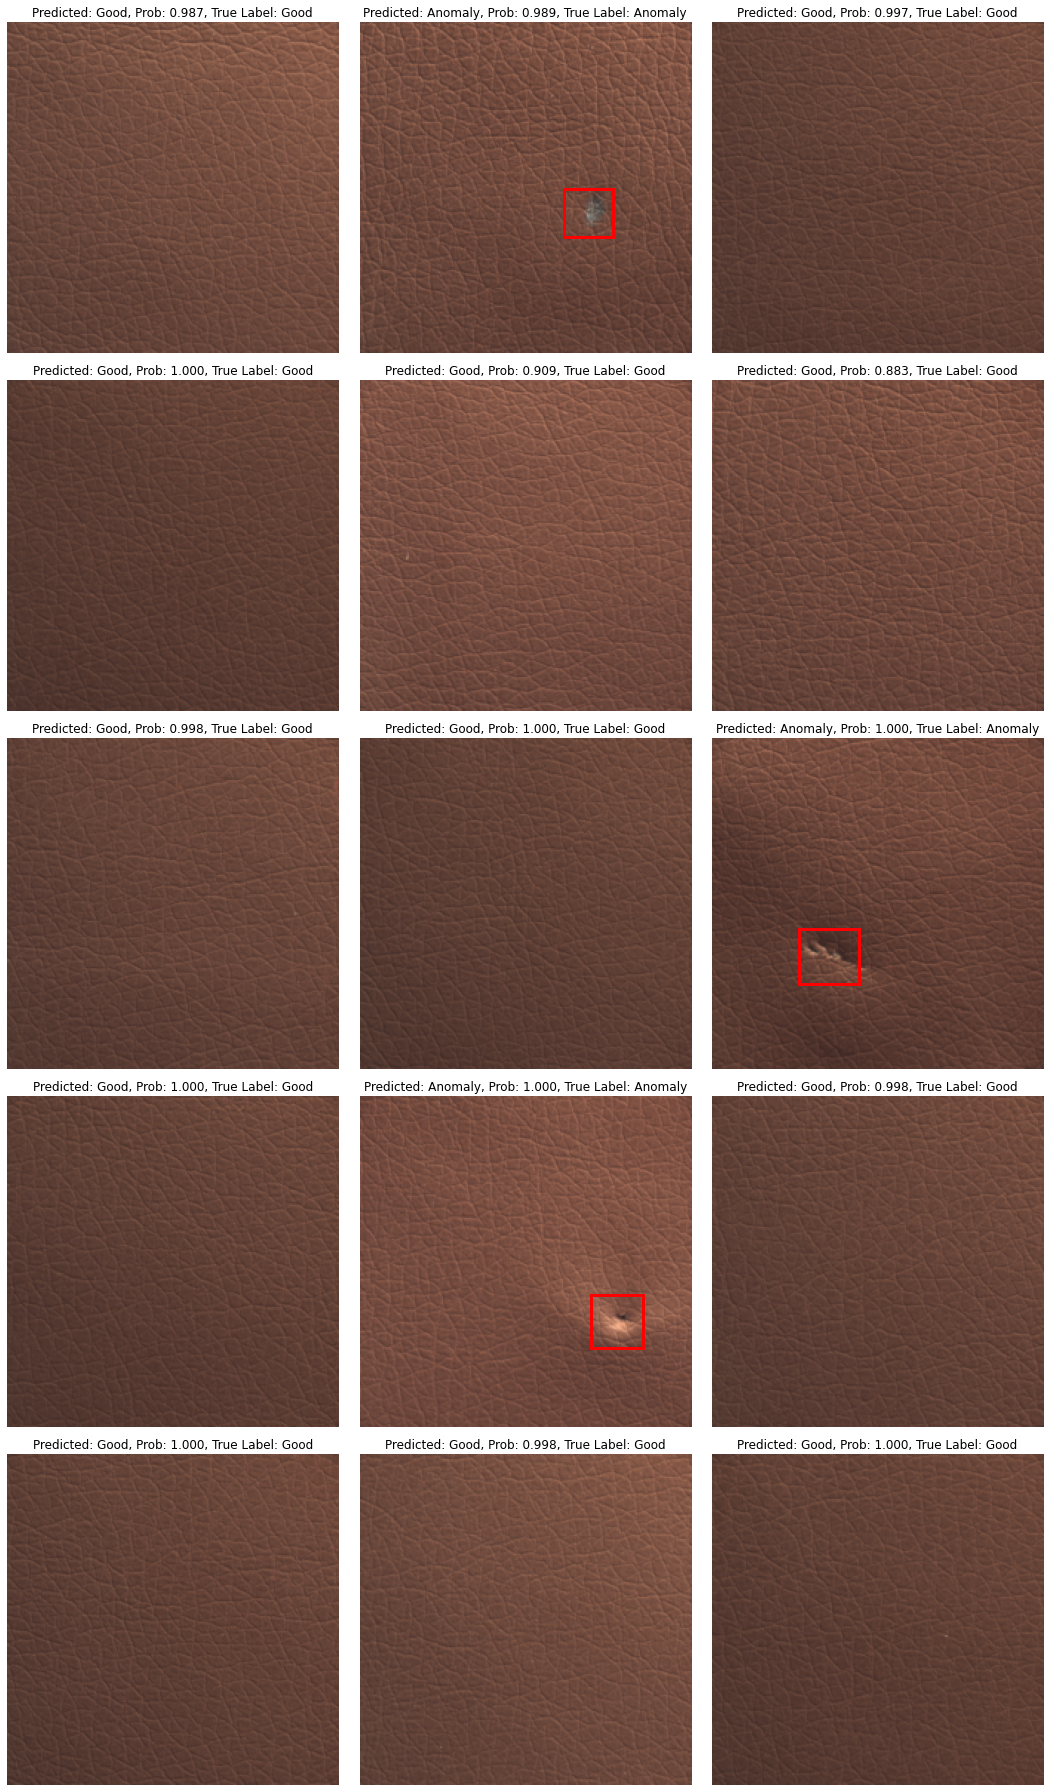

In [ ]:
predict_localize(
    model, test_loader, device, thres=heatmap_thres, n_samples=15, show_heatmap=False
)